# ***Data Preprocessing and Feature Engineering***

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv("/content/drive/MyDrive/Classroom/loan.csv")
data.head()
#load the csv file and rint first 5 rows of the query.Note that raw_data is a DataFrame object. Pandas DataFrame is a two-dimensional size-
#mutable, potentially heterogeneous tabular data structure with labeled axes (rows and
#columns

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# **Exploring the loan data**

In [11]:
#Dislay no of rows and columns in the Dataframe
data.shape

(20000, 142)

In [12]:
#display the shape of the DataFrame
data.dtypes

,0
id,float64
member_id,float64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,int64
...,...
settlement_status,float64
settlement_date,float64
settlement_amount,float64
settlement_percentage,float64


In [13]:
#explore a particular column in the data frame
data['loan_amnt'].head()

,loan_amnt
0,2500
1,30000
2,5000
3,4000
4,30000


# **Removing irrelevant columns**

In [14]:
data= data.drop(['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d', 'verification_status', 'pymnt_plan', 'funded_amnt_inv', 'sub_grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'initial_list_status'], axis =1)

In [15]:
data.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# **Dealing with missing values**

In [ ]:
#delete columns having more than 20 % of missing values and emty raws also
#NaN stands for ‘Not a number’.
#pandas.isnull method could be used to identify null or missing values

In [22]:
col_num=0
TotalObjects =data.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in data:
   nullCount = data[x].isnull().sum();
   nullPercent = nullCount*100 / (TotalObjects)
   if nullCount > 0 and nullPercent > 20 :
      col_num=col_num+1
      data.drop(x, axis=1,inplace=True)
      print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%
id					 100.0
member_id					 100.0
url					 100.0
desc					 100.0
mths_since_last_delinq					 56.375
mths_since_last_record					 88.41
mths_since_last_major_derog					 77.47
annual_inc_joint					 87.845
dti_joint					 87.845
verification_status_joint					 89.17
mths_since_recent_bc_dlq					 80.36
mths_since_recent_revol_delinq					 71.3
revol_bal_joint					 87.845
sec_app_earliest_cr_line					 87.845
sec_app_inq_last_6mths					 87.845
sec_app_mort_acc					 87.845
sec_app_open_acc					 87.845
sec_app_revol_util					 88.0
sec_app_open_act_il					 87.845
sec_app_num_rev_accts					 87.845
sec_app_chargeoff_within_12_mths					 87.845
sec_app_collections_12_mths_ex_med					 87.845
sec_app_mths_since_last_major_derog					 96.295
hardship_type					 100.0
hardship_reason					 100.0
hardship_status					 100.0
deferral_term					 100.0
hardship_amount					 100.0
hardship_start_date					 100.0
hardship_end_date					 100.0
payment_plan_start_date					 100.0
hardship_length		

In [23]:
data.shape

(20000, 79)

In [28]:
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


In [31]:
#DataFrame.fillna could be used be used to fill the NaN values indicating missing values in a column
data['next_pymnt_d'].fillna('completed',inplace = True)
columns_to_zero = ['mths_since_rcnt_il', 'mo_sin_old_il_acct', 'bc_open_to_buy',
                   'num_tl_120dpd_2m', 'bc_util', 'percent_bc_gt_75']
data[columns_to_zero] = data[columns_to_zero].fillna(0)
data['all_util'].fillna(data['all_util'].mean(), inplace=True)
data['avg_cur_bal'].fillna(data['avg_cur_bal'].mean(),inplace = True)

<ipython-input-31-3ba33ae71d92>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['next_pymnt_d'].fillna('completed',inplace = True)
<ipython-input-31-3ba33ae71d92>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# **Formatting data**

In [32]:

#Emp_length column of the DataFrame contains information on how long an employee has been employed
#It returns the unique values in the dataFrame as an array

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [33]:
def CalculateEmployeeLength(year):
   if year == '< 1 year':
         return 0.5
   elif year == '10+ years':
          return 10
   else:
          yr=str(year)
          return yr.rstrip(' years')
#rounding and calculations we need the emp_length in numerical format rather than in a textual format.
#The rstrip() method returns a copy of the string with trailing characters removed (based on the string argument passed)

In [35]:
data['emp_length']=data['emp_length'].apply(CalculateEmployeeLength)

In [36]:
pd.unique(data['emp_length'].values)

array([10, '6', '4', 0.5, '2', '9', 'nan', '5', '3', '7', '1', '8'],
      dtype=object)

# **Visualizing data**

In [41]:
def CalculateLoanRanges(value):
   if value <= 5000:
      return '5K and Below'
   if value > 5000 and value <= 10000:
      return '5K-10K'
   if value > 10000 and value <= 15000:
      return '10K-15K'
   if value > 15000 and value <= 20000:
      return '15K-20K'
   if value > 20000 and value <= 25000:
      return '20K-25K'
   if value > 25000 and value <= 30000:
      return '25K-30K'


In [42]:
loan_ranges = data['loan_amnt'].apply(CalculateLoanRanges)

In [43]:
loan_ranges.value_counts()

,count
loan_amnt,
5K-10K,5063
10K-15K,3472
15K-20K,3118
5K and Below,2898
20K-25K,1834
25K-30K,1347


Text(0.5, 1.0, 'Pie Chart of Loan Amount')

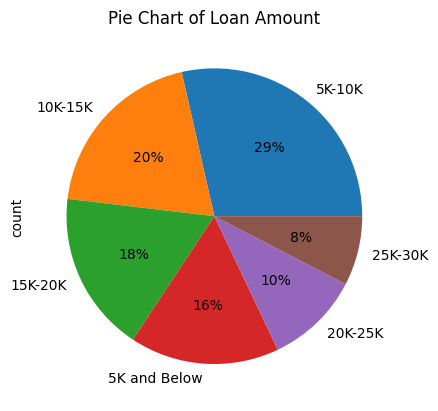

In [44]:
#to create a pie chart from the data above. In python matplotlib.pyplot.figure function is used to create a figure.
f = plt.figure()
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Loan Amount')

<Axes: xlabel='purpose'>

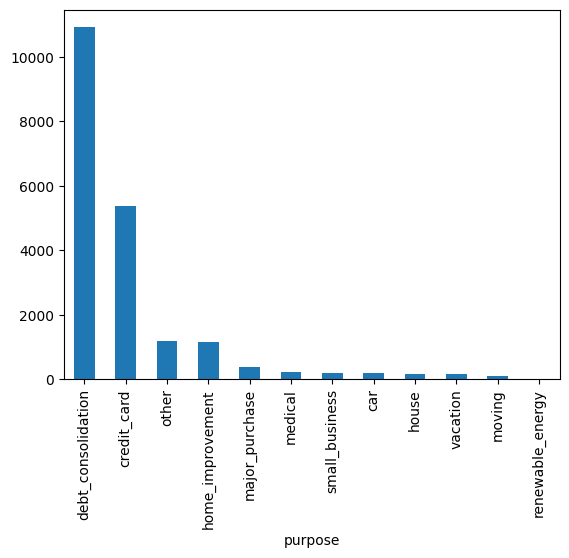

In [46]:
#to create a bar chart from the data above
pur = data['purpose'].value_counts()
pur.plot(kind='bar')

In [47]:
#save the cleaned data in a new csv file f
data.to_csv('cleaned_loans2007.csv', index=False,encoding='utf-8')

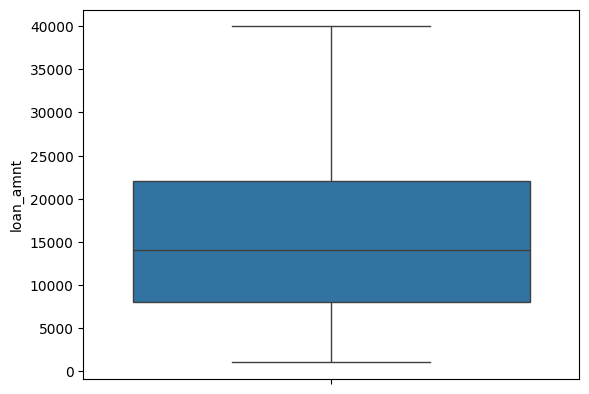

In [50]:
#Generate a Box-plot
sns.boxplot(data['loan_amnt'])
plt.show()

In [52]:
#Finding the IQR
percentile25 = data['loan_amnt'].quantile(0.25)
percentile75 = data['loan_amnt'].quantile(0.75)
iqr = percentile75-percentile25

In [53]:
#Finding upper and lower limit
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

In [54]:
#Capping
new_cap = data.copy()
new_cap['loan_amnt'] = np.where(
 new_cap['loan_amnt'] >= upper_limit, upper_limit,
 np.where(new_cap['loan_amnt'] <= lower_limit, lower_limit,
   new_cap['loan_amnt']
)
)

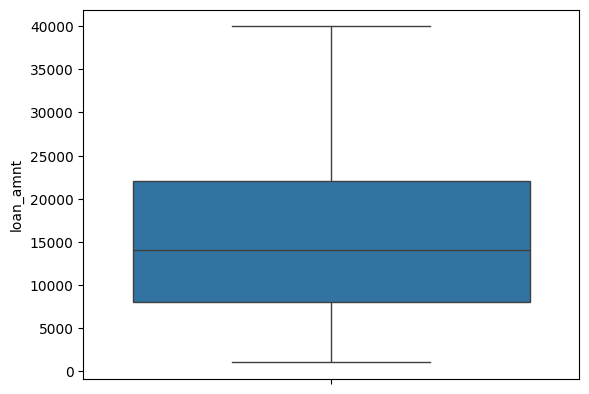

In [55]:
#Draw boxplot after capping
sns.boxplot(data['loan_amnt'])
plt.show()